### K-Nearest Neighbor Algorithmus:

#### Parameter:  

dataset = (X, Y)  
mit X := Features  
und Y := Classes  

K := Hyperparameter für die nächsten k Nachbarn  
sample := Neuer Datenpunkt zum Klassifizieren 

#### Pseudo-Code:

kNN (dataset, K, sample):  
  - Bestimme von jedem Punkt $p \in dataset$ die Distanz, mit der geg. Distanzfunktion.
  - Bestimme die $K$ nächst gelegenen Nachbarn und bestimme die zugehörige Klasse von $sample$.  

In [19]:
import numpy as np
np.random.seed(42)

In [20]:
def generate_dataset():
    num_samples_class1 = 10
    num_samples_class2 = 6
    num_samples_class3 = 13
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(
        np.array([0, 0]), cov, num_samples_class1
    )
    data2 = np.random.multivariate_normal(
        np.array([-10, 4]), cov, num_samples_class2
    )
    data3 = np.random.multivariate_normal(
        np.array([10, 10]), cov, num_samples_class3
    )
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array(
        [0 for i in range(num_samples_class1)] +
        [1 for i in range(num_samples_class2)] +
        [2 for i in range(num_samples_class3)]
    )
    return data, classes

In [21]:
x, y = generate_dataset()

In [22]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"x:\n{x}")
print(f"y:\n{y}")

x shape: (29, 2)
y shape: (29,)
x:
[[  0.49671415  -0.1382643 ]
 [  0.64768854   1.52302986]
 [ -0.23415337  -0.23413696]
 [  1.57921282   0.76743473]
 [ -0.46947439   0.54256004]
 [ -0.46341769  -0.46572975]
 [  0.24196227  -1.91328024]
 [ -1.72491783  -0.56228753]
 [ -1.01283112   0.31424733]
 [ -0.90802408  -1.4123037 ]
 [ -8.53435123   3.7742237 ]
 [ -9.9324718    2.57525181]
 [-10.54438272   4.11092259]
 [-11.15099358   4.37569802]
 [-10.60063869   3.70830625]
 [-10.60170661   5.85227818]
 [  9.98650278   8.94228907]
 [ 10.82254491   8.77915635]
 [ 10.2088636    8.04032988]
 [  8.67181395  10.19686124]
 [ 10.73846658  10.17136828]
 [  9.88435172   9.6988963 ]
 [  8.52147801   9.28015579]
 [  9.53936123  11.05712223]
 [ 10.34361829   8.23695984]
 [ 10.32408397   9.61491772]
 [  9.323078    10.61167629]
 [ 11.03099952  10.93128012]
 [  9.16078248   9.69078762]]
y:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [23]:
import matplotlib.pyplot as plt

def plot_dataset(x, y):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(x):
        plt.scatter(point[0], point[1], color=colors[y[index]])
    plt.show()

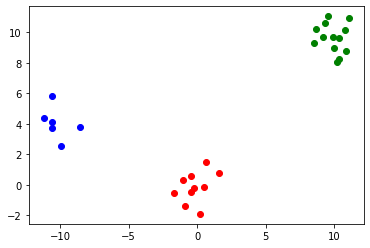

In [24]:
plot_dataset(x, y)

### KNN Implementation

In [25]:
class KNeighborsClassifier:
    def __init__(self, n_neighbors: int = 5):
        self.n_neighbors = n_neighbors
        self.X = None
        self.y = None
        self.num_classes = None
    
    def _distance(self, p1: np.ndarray, p2: np.ndarray):
        return np.linalg.norm(p1 - p2)
    
    def kneighbors(self, X_samples: np.ndarray):
        neighbors_idxs = np.array(
            [np.argsort([self._distance(sample, x_i) for x_i in self.X])[:self.n_neighbors] for sample in X_samples]
        )
        return neighbors_idxs
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X = X
        self.y = y
        self.num_classes = len(np.unique(self.y))
    
    def _vote_class(self, neighbors_idxs: np.ndarray):
        votes = np.array([0 for class_idx in range(self.num_classes)])
        for neighbor_idx in neighbors_idxs:
            neighbor_class = self.y[neighbor_idx]
            votes[neighbor_class] += 1
        voted_class = np.argmax(votes)
        return voted_class
    
    def predict(self, X_samples: np.ndarray):
        neighbors_idxs = self.kneighbors(X_samples)
        y_pred = np.array([self._vote_class(neighbors_idx) for neighbors_idx in neighbors_idxs])
        return y_pred
    
    def score(self, X_samples: np.ndarray, y_samples: np.ndarray):
        y_pred = self.predict(X_samples)
        accuracy = np.sum([y_pred_i == y_i for y_pred_i, y_i in zip(y_pred, y_samples)]) / len(y_samples)

In [26]:
x_test = np.array([[0.0, 4.0], [-5.0, 4.0]])
y_test = np.array([0, 1])

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x, y)

neighbors_idxs = clf.kneighbors(x_test)
print(f"NeighborsIdxs:\n{neighbors_idxs}")
print(f"NeighborsPoints:\n{x[neighbors_idxs]}")
print(f"NeighborsClasses:\n{y[neighbors_idxs]}")

print(f"TestSamples:\n{x_test}")
print(f"Predictions:\n{clf.predict(x_test)}")
print(f"Score:\n{clf.score(x_test, y_test)}")

NeighborsIdxs:
[[ 1  4  3]
 [10 11  8]]
NeighborsPoints:
[[[ 0.64768854  1.52302986]
  [-0.46947439  0.54256004]
  [ 1.57921282  0.76743473]]

 [[-8.53435123  3.7742237 ]
  [-9.9324718   2.57525181]
  [-1.01283112  0.31424733]]]
NeighborsClasses:
[[0 0 0]
 [1 1 0]]
TestSamples:
[[ 0.  4.]
 [-5.  4.]]
Predictions:
[0 1]
Score:
None


In [27]:
def plot_knn_prediction(clf, samples):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(x):
        plt.scatter(point[0], point[1], color=colors[clf.y[index]])
    neighbors_idxs = clf.kneighbors(samples)
    neighbors_points = clf.X[neighbors_idxs]
    for idx, sample in enumerate(samples):
        plt.scatter(sample[0], sample[1], color="yellow")
        for neighbor_point in neighbors_points[idx]:
            plt.plot((neighbor_point[0], sample[0]), (neighbor_point[1], sample[1]), color="cyan")
    plt.show()

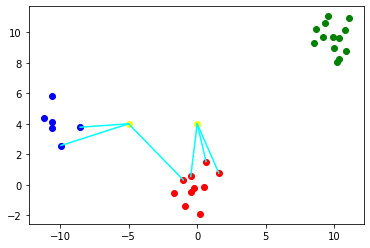

In [28]:
plot_knn_prediction(clf, x_test)